In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.DataFrame([10,20,30,40], columns = ['numbers'], index = ['a', 'b', 'c', 'd'])

In [3]:
df

,numbers
a,10
b,20
c,30
d,40


In [4]:
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [5]:
df.columns

Index(['numbers'], dtype='object')

In [6]:
df.loc['c']

numbers    30
Name: c, dtype: int64

In [7]:
df.loc[['a','c']]

,numbers
a,10
c,30


In [8]:
df.loc[df.index[1:3]]

,numbers
b,20
c,30


In [9]:
df.sum()

numbers    100
dtype: int64

In [10]:
df.apply(lambda x: x**2)

,numbers
a,100
b,400
c,900
d,1600


In [11]:
df**2

,numbers
a,100
b,400
c,900
d,1600


In [12]:
df['floats'] = (1.5,2.5,3.5,4.5)

In [13]:
df

,numbers,floats
a,10,1.5
b,20,2.5
c,30,3.5
d,40,4.5


In [14]:
df['floats']

a    1.5
b    2.5
c    3.5
d    4.5
Name: floats, dtype: float64

In [15]:
# 열 추가

df['names'] = pd.DataFrame(['yves','guido','felix','francesc'],
                           index = ['d','a','b','c'])

In [16]:
df

,numbers,floats,names
a,10,1.5,guido
b,20,2.5,felix
c,30,3.5,francesc
d,40,4.5,yves


In [17]:
df.append({'numbers':100, 'floats':5.75,'names':'henry'},ignore_index = True)

# 인덱스가 정수 인덱스로 변경 -> 자료 직접 추가는 하지 않는것이 좋다

# df 자체가 바뀌진 않아 / 임시 추가

,numbers,floats,names
0,10,1.50,guido
1,20,2.50,felix
2,30,3.50,francesc
3,40,4.50,yves
4,100,5.75,henry


In [18]:
df = df.append(pd.DataFrame({'numbers':100, 'floats':10, 'names':'henry'},index = ['z',]))

# 인덱스 변화 X

In [19]:
df

,numbers,floats,names
a,10,1.5,guido
b,20,2.5,felix
c,30,3.5,francesc
d,40,4.5,yves
z,100,10.0,henry


In [20]:
# join - 누락된 자료는 NaN 으로 처리

df.join(pd.DataFrame([1,4,9,16,25],
                    index = ['a','b','c','x','y'],
                    columns = ['squares',],copy = bool),sort = True)

,numbers,floats,names,squares
a,10,1.5,guido,1.0
b,20,2.5,felix,4.0
c,30,3.5,francesc,9.0
d,40,4.5,yves,NaN
z,100,10.0,henry,NaN


In [21]:
# how 활용

print(df.join(pd.DataFrame([1,4,9,16,25],
                    index = ['a','b','c','x','y'],
                    columns = ['squares',]),
                    how = 'outer'))                    # 합집함 -> NaN으로 표시

print(df.join(pd.DataFrame([1,4,9,16,25],
                    index = ['a','b','c','x','y'],
                    columns = ['squares',]),
                    how = 'inner'))                    # 교집합

print(df.join(pd.DataFrame([1,4,9,16,25],
                    index = ['a','b','c','x','y'],
                    columns = ['squares',]),
                    how = 'left'))  

print(df.join(pd.DataFrame([1,4,9,16,25],
                    index = ['a','b','c','x','y'],
                    columns = ['squares',]),
                    how = 'right'))  

   numbers  floats     names  squares
a     10.0     1.5     guido      1.0
b     20.0     2.5     felix      4.0
c     30.0     3.5  francesc      9.0
d     40.0     4.5      yves      NaN
x      NaN     NaN       NaN     16.0
y      NaN     NaN       NaN     25.0
z    100.0    10.0     henry      NaN
   numbers  floats     names  squares
a       10     1.5     guido        1
b       20     2.5     felix        4
c       30     3.5  francesc        9
   numbers  floats     names  squares
a       10     1.5     guido      1.0
b       20     2.5     felix      4.0
c       30     3.5  francesc      9.0
d       40     4.5      yves      NaN
z      100    10.0     henry      NaN
   numbers  floats     names  squares
a     10.0     1.5     guido        1
b     20.0     2.5     felix        4
c     30.0     3.5  francesc        9
x      NaN     NaN       NaN       16
y      NaN     NaN       NaN       25


In [22]:
# 열의 평균/표준편차

df[['numbers','floats']].mean()

df[['numbers','floats']].std()

numbers    35.355339
floats      3.324154
dtype: float64

# 수치자료 활용

In [23]:
a = np.random.standard_normal((9,4)) # ndarray 생성
a.round(6)

array([[-1.469275,  1.430726, -0.864515,  1.054867],
       [ 0.541586, -0.901215,  0.183149, -0.520857],
       [ 0.2273  , -1.146954, -0.235398,  0.730263],
       [-1.237859,  0.361708,  2.683431,  1.148788],
       [ 1.015093, -0.959382, -1.100584, -0.5444  ],
       [ 0.565817,  0.971863,  0.753107, -0.558244],
       [-0.580155,  0.756691, -0.220184, -0.280445],
       [ 0.706029,  0.012714, -0.589369, -0.843846],
       [-2.515738,  0.494035,  0.864069, -0.521478]])

In [24]:
df = pd.DataFrame(a)  # ndarray -> data frame 전환
df

,0,1,2,3
0,-1.469275,1.430726,-0.864515,1.054867
1,0.541586,-0.901215,0.183149,-0.520857
2,0.227300,-1.146954,-0.235398,0.730263
3,-1.237859,0.361708,2.683431,1.148788
4,1.015093,-0.959382,-1.100584,-0.544400
5,0.565817,0.971863,0.753107,-0.558244
6,-0.580155,0.756691,-0.220184,-0.280445
7,0.706029,0.012714,-0.589369,-0.843846
8,-2.515738,0.494035,0.864069,-0.521478


In [25]:
df.columns = ['no1','no2','no3','no4']
df

,no1,no2,no3,no4
0,-1.469275,1.430726,-0.864515,1.054867
1,0.541586,-0.901215,0.183149,-0.520857
2,0.227300,-1.146954,-0.235398,0.730263
3,-1.237859,0.361708,2.683431,1.148788
4,1.015093,-0.959382,-1.100584,-0.544400
5,0.565817,0.971863,0.753107,-0.558244
6,-0.580155,0.756691,-0.220184,-0.280445
7,0.706029,0.012714,-0.589369,-0.843846
8,-2.515738,0.494035,0.864069,-0.521478


In [26]:
df['no2'][3]

0.36170806328935984

# 시간 Index

In [27]:
dates = pd.date_range('2015-1-1', periods = 9, freq = 'M') # 시간 생성  # freq(주기 인수값) : P.186
dates

DatetimeIndex(['2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30'],
              dtype='datetime64[ns]', freq='M')

In [28]:
df.index = dates
df

,no1,no2,no3,no4
2015-01-31,-1.469275,1.430726,-0.864515,1.054867
2015-02-28,0.541586,-0.901215,0.183149,-0.520857
2015-03-31,0.227300,-1.146954,-0.235398,0.730263
2015-04-30,-1.237859,0.361708,2.683431,1.148788
2015-05-31,1.015093,-0.959382,-1.100584,-0.544400
2015-06-30,0.565817,0.971863,0.753107,-0.558244
2015-07-31,-0.580155,0.756691,-0.220184,-0.280445
2015-08-31,0.706029,0.012714,-0.589369,-0.843846
2015-09-30,-2.515738,0.494035,0.864069,-0.521478


In [29]:
np.array(df).round(6)  # data frame -> ndarray 전환

array([[-1.469275,  1.430726, -0.864515,  1.054867],
       [ 0.541586, -0.901215,  0.183149, -0.520857],
       [ 0.2273  , -1.146954, -0.235398,  0.730263],
       [-1.237859,  0.361708,  2.683431,  1.148788],
       [ 1.015093, -0.959382, -1.100584, -0.5444  ],
       [ 0.565817,  0.971863,  0.753107, -0.558244],
       [-0.580155,  0.756691, -0.220184, -0.280445],
       [ 0.706029,  0.012714, -0.589369, -0.843846],
       [-2.515738,  0.494035,  0.864069, -0.521478]])

In [30]:
# 열방향 합,평균,누적합
df.sum()

df.mean()

df.cumsum()

,no1,no2,no3,no4
2015-01-31,-1.469275,1.430726,-0.864515,1.054867
2015-02-28,-0.927689,0.529511,-0.681366,0.534010
2015-03-31,-0.700389,-0.617444,-0.916764,1.264273
2015-04-30,-1.938248,-0.255735,1.766667,2.413061
2015-05-31,-0.923156,-1.215117,0.666082,1.868661
2015-06-30,-0.357339,-0.243254,1.419189,1.310417
2015-07-31,-0.937494,0.513437,1.199005,1.029972
2015-08-31,-0.231465,0.526151,0.609636,0.186125
2015-09-30,-2.747203,1.020186,1.473705,-0.335353


In [31]:
# 통계 값  -> describe로 한번에!
df.describe()

,no1,no2,no3,no4
count,9.000000,9.000000,9.000000,9.000000
mean,-0.305245,0.113354,0.163745,-0.037261
std,1.209960,0.926796,1.157408,0.782241
min,-2.515738,-1.146954,-1.100584,-0.843846
25%,-1.237859,-0.901215,-0.589369,-0.544400
50%,0.227300,0.361708,-0.220184,-0.520857
75%,0.565817,0.756691,0.753107,0.730263
max,1.015093,1.430726,2.683431,1.148788


In [32]:
np.sqrt(df)

C:\Users\anrnd\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


,no1,no2,no3,no4
2015-01-31,NaN,1.196130,NaN,1.027067
2015-02-28,0.735925,NaN,0.427959,NaN
2015-03-31,0.476760,NaN,NaN,0.854554
2015-04-30,NaN,0.601422,1.638118,1.071815
2015-05-31,1.007518,NaN,NaN,NaN
2015-06-30,0.752208,0.985831,0.867817,NaN
2015-07-31,NaN,0.869880,NaN,NaN
2015-08-31,0.840255,0.112756,NaN,NaN
2015-09-30,NaN,0.702876,0.929553,NaN


In [33]:
np.sqrt(df).sum() # NaN 값은 제외하고 사용가능한 값만 계산

C:\Users\anrnd\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


no1    3.812666
no2    4.468894
no3    3.863447
no4    2.953437
dtype: float64

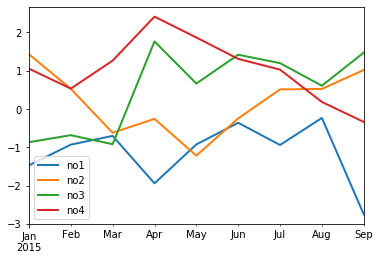

In [34]:
%matplotlib inline
df.cumsum().plot(lw=2.0)

# series 클래스

In [35]:
#지금까진 Data frame 클래스

In [36]:
# -> Series 클래스

In [37]:
df['no1']

2015-01-31   -1.469275
2015-02-28    0.541586
2015-03-31    0.227300
2015-04-30   -1.237859
2015-05-31    1.015093
2015-06-30    0.565817
2015-07-31   -0.580155
2015-08-31    0.706029
2015-09-30   -2.515738
Freq: M, Name: no1, dtype: float64

In [38]:
type(df['no1'])

pandas.core.series.Series

Text(0, 0.5, 'value')

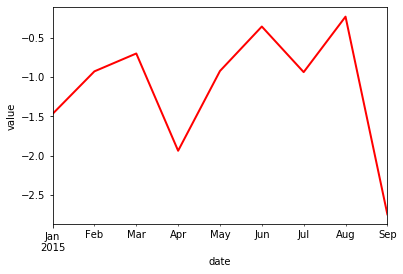

In [39]:
import matplotlib.pyplot as plt
df['no1'].cumsum().plot(style = 'r', lw = 2.)
plt.xlabel('date')
plt.ylabel('value')

# GroupBy 연산

In [40]:
df['quarter'] = ['q1','q1','q1','q2','q2','q2','q3','q3','q3']
df

,no1,no2,no3,no4,quarter
2015-01-31,-1.469275,1.430726,-0.864515,1.054867,q1
2015-02-28,0.541586,-0.901215,0.183149,-0.520857,q1
2015-03-31,0.227300,-1.146954,-0.235398,0.730263,q1
2015-04-30,-1.237859,0.361708,2.683431,1.148788,q2
2015-05-31,1.015093,-0.959382,-1.100584,-0.544400,q2
2015-06-30,0.565817,0.971863,0.753107,-0.558244,q2
2015-07-31,-0.580155,0.756691,-0.220184,-0.280445,q3
2015-08-31,0.706029,0.012714,-0.589369,-0.843846,q3
2015-09-30,-2.515738,0.494035,0.864069,-0.521478,q3


In [41]:
groups = df.groupby('quarter')

In [42]:
groups.mean()

groups.max()

groups.size()

quarter
q1    3
q2    3
q3    3
dtype: int64

In [43]:
df['odd_even'] = ['odd','even','odd','even','odd','even','odd','even','odd']
df

,no1,no2,no3,no4,quarter,odd_even
2015-01-31,-1.469275,1.430726,-0.864515,1.054867,q1,odd
2015-02-28,0.541586,-0.901215,0.183149,-0.520857,q1,even
2015-03-31,0.227300,-1.146954,-0.235398,0.730263,q1,odd
2015-04-30,-1.237859,0.361708,2.683431,1.148788,q2,even
2015-05-31,1.015093,-0.959382,-1.100584,-0.544400,q2,odd
2015-06-30,0.565817,0.971863,0.753107,-0.558244,q2,even
2015-07-31,-0.580155,0.756691,-0.220184,-0.280445,q3,odd
2015-08-31,0.706029,0.012714,-0.589369,-0.843846,q3,even
2015-09-30,-2.515738,0.494035,0.864069,-0.521478,q3,odd


In [44]:
groups = df.groupby(['quarter','odd_even'])
groups.size()

quarter  odd_even
q1       even        1
         odd         2
q2       even        2
         odd         1
q3       even        1
         odd         2
dtype: int64

In [45]:
groups.mean()

no1       no2       no3       no4
quarter odd_even                                        
q1      even      0.541586 -0.901215  0.183149 -0.520857
        odd      -0.620988  0.141886 -0.549956  0.892565
q2      even     -0.336021  0.666785  1.718269  0.295272
        odd       1.015093 -0.959382 -1.100584 -0.544400
q3      even      0.706029  0.012714 -0.589369 -0.843846
        odd      -1.547946  0.625363  0.321942 -0.400962

# 실제 자료에 적용

In [46]:
from pandas_datareader import data as web

In [47]:
DAX = web.DataReader(name = '^GDAXI', data_source = 'yahoo', start = '2000-1-1')
DAX # DAX.info()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,7159.330078,6720.870117,6961.720215,6750.759766,43072500.0,6750.759766
2000-01-04,6755.359863,6510.459961,6747.240234,6586.950195,46678400.0,6586.950195
2000-01-05,6585.850098,6388.910156,6585.850098,6502.069824,52682800.0,6502.069824
2000-01-06,6539.310059,6402.629883,6501.450195,6474.919922,41180600.0,6474.919922
2000-01-07,6791.529785,6470.140137,6489.939941,6780.959961,56058900.0,6780.959961
...,...,...,...,...,...,...
2021-03-01,14022.019531,13873.830078,13962.429688,14012.820312,69566200.0,14012.820312
2021-03-02,14101.790039,13961.620117,13962.070312,14039.799805,63307700.0,14039.799805
2021-03-03,14197.490234,13979.730469,14130.860352,14080.030273,84766900.0,14080.030273


In [48]:
DAX.tail() # 마지막 5개 보여준다

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-03-01,14022.019531,13873.830078,13962.429688,14012.820312,69566200.0,14012.820312
2021-03-02,14101.790039,13961.620117,13962.070312,14039.799805,63307700.0,14039.799805
2021-03-03,14197.490234,13979.730469,14130.860352,14080.030273,84766900.0,14080.030273
2021-03-04,14095.809570,13959.269531,14015.440430,14056.339844,84620900.0,14056.339844
2021-03-05,14068.030273,13868.200195,13958.540039,13920.690430,89791900.0,13920.690430


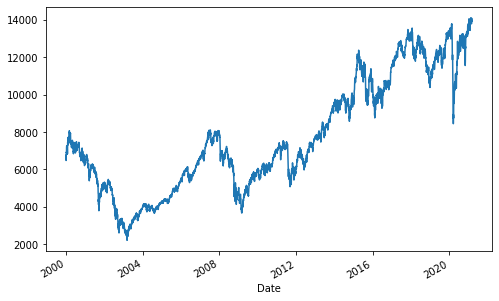

In [49]:
DAX['Close'].plot(figsize = (8,5))

In [50]:
# 반복문을 사용한 로그수익률
%time DAX['Ret_Loop'] = 0.0
for i in range(1,len(DAX)):
    DAX['Ret_Loop'][i] = np.log(DAX['Close'][i]/DAX['Close'][i-1])

Wall time: 4.95 ms


In [51]:
DAX[['Close','Ret_Loop']].tail()

,Close,Ret_Loop
Date,,
2021-03-01,14012.820312,0.016298
2021-03-02,14039.799805,0.001923
2021-03-03,14080.030273,0.002861
2021-03-04,14056.339844,-0.001684
2021-03-05,13920.690430,-0.009697


In [52]:
# 반복문 없이 shift method를 사용한 로그수익률

%time DAX['Return'] = np.log(DAX['Close']/DAX['Close'].shift(1))    # shift : 객체를 앞이나 뒤로 이동시키는 연산

Wall time: 3.99 ms


In [53]:
DAX[['Close','Ret_Loop','Return']].tail()

,Close,Ret_Loop,Return
Date,,,
2021-03-01,14012.820312,0.016298,0.016298
2021-03-02,14039.799805,0.001923,0.001923
2021-03-03,14080.030273,0.002861,0.002861
2021-03-04,14056.339844,-0.001684,-0.001684
2021-03-05,13920.690430,-0.009697,-0.009697


In [54]:
# 열 삭제 (똑같은 로그수익률이 2개니까)

#del DAX['Ret_Loop']
DAX

,High,Low,Open,Close,Volume,Adj Close,Ret_Loop,Return
Date,,,,,,,,
2000-01-03,7159.330078,6720.870117,6961.720215,6750.759766,43072500.0,6750.759766,0.000000,NaN
2000-01-04,6755.359863,6510.459961,6747.240234,6586.950195,46678400.0,6586.950195,-0.024565,-0.024565
2000-01-05,6585.850098,6388.910156,6585.850098,6502.069824,52682800.0,6502.069824,-0.012970,-0.012970
2000-01-06,6539.310059,6402.629883,6501.450195,6474.919922,41180600.0,6474.919922,-0.004184,-0.004184
2000-01-07,6791.529785,6470.140137,6489.939941,6780.959961,56058900.0,6780.959961,0.046182,0.046182
...,...,...,...,...,...,...,...,...
2021-03-01,14022.019531,13873.830078,13962.429688,14012.820312,69566200.0,14012.820312,0.016298,0.016298
2021-03-02,14101.790039,13961.620117,13962.070312,14039.799805,63307700.0,14039.799805,0.001923,0.001923
2021-03-03,14197.490234,13979.730469,14130.860352,14080.030273,84766900.0,14080.030273,0.002861,0.002861


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000028C2DDBBB08>,
      dtype=object)

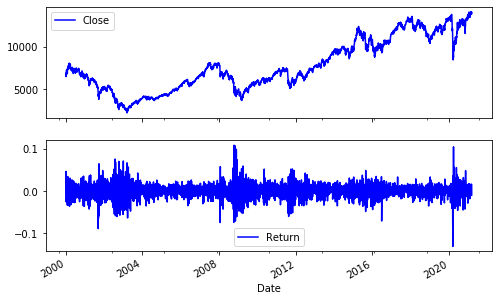

In [55]:
DAX[['Close','Return']].plot(subplots = True, style = 'b',figsize = (8,5)) # subplots = True : 그래프를 별개로 그리기

In [56]:
# 이동평균선 추가 -> rolling_mean (rolling_max, rolling_min, rolling_corr 등)

#DAX['252d'] = pd.rolling_mean(DAX['Close'], window = 252) --- 예전 버전

#DAX['42d'] = pd.Series(DAX['Close']).rolling(window = 42).mean()
#DAX['252d'] = pd.Series(DAX['Close']).rolling(window = 252).mean()

DAX['42d1'] = DAX['Close'].rolling(42).mean()
DAX['252d1'] = DAX['Close'].rolling(252).mean()

In [57]:
DAX[['Close', '42d', '42d1', '42d','252d1']].tail()

KeyError: "['42d'] not in index"

In [ ]:
DAX[['Close', '42d', '42d1', '252d', '42d1']].plot(figsize = (8,5))

In [ ]:
# 로그수익률의 이동 표준편차(변동성) _ 연간

import math
DAX['Mov_Vol'] = DAX['Return'].rolling(252).std() * math.sqrt(252)

In [58]:
DAX[['Close', 'Mov_Vol', 'Return']].plot(subplots = True, style = 'b', figsize = (8,7))

KeyError: "['Mov_Vol'] not in index"

# 회귀분석

In [59]:
import pandas as pd
from urllib.request import urlretrieve

In [69]:
es_url = 'http://www.stoxx.com/download/historical_values/hbrbcpe.txt'
vs_url = 'http://www.stoxx.com/download/historical_values/h_vstoxx.txt'

save1 = 'C:/Users/anrnd/Desktop/파이썬 금융분석/es.txt'
save2 = 'C:/Users/anrnd/Desktop/파이썬 금융분석/vs.txt'

urlretrieve(es_url, save1)
urlretrieve(vs_url, save2)

('C:/Users/anrnd/Desktop/파이썬 금융분석/vs.txt',
 <http.client.HTTPMessage at 0x28c2da27c88>)

In [70]:
lines = open(save1, 'r').readlines()
lines = [line.replace(' ','') for line in lines]

In [71]:
lines[:6]

['PriceIndices-EUROCurrency\n',
 'Date;Blue-Chip;Blue-Chip;Broad;Broad;ExUK;ExEuroZone;Blue-Chip;Broad\n',
 ';Europe;Euro-Zone;Europe;Euro-Zone;;;Nordic;Nordic\n',
 ';SX5P;SX5E;SXXP;SXXE;SXXF;SXXA;DK5F;DKXF\n',
 '31.12.1986;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n',
 '01.01.1987;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n']

In [72]:
for line in lines[3883:3890]:
    print(line[41:])            # 2001년 12/27부터 각 줄 끝에 세미콜론 추가됨

317.10;267.23;5268.36;363.19

322.55;272.18;5360.52;370.94

322.69;272.95;5360.52;370.94

327.57;277.68;5479.59;378.69;

329.94;278.87;5585.35;386.99;

326.77;272.38;5522.25;380.09;

332.62;277.08;5722.57;396.12;



In [73]:
new_file = open('C:/Users/anrnd/Desktop/파이썬 금융분석/es50.txt', 'w')
new_file.writelines('date' + lines[3][:-1]
                   + ';DEL' + lines[3][-1])
new_file.writelines(lines[4:])
new_file.close()

In [74]:
new_lines = open('C:/Users/anrnd/Desktop/파이썬 금융분석/es50.txt', 'r').readlines()
new_lines[:5]

['date;SX5P;SX5E;SXXP;SXXE;SXXF;SXXA;DK5F;DKXF;DEL\n',
 '31.12.1986;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n',
 '01.01.1987;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n',
 '02.01.1987;770.89;891.78;82.57;97.80;97.43;69.37;647.62;65.81\n',
 '05.01.1987;771.89;898.33;82.82;98.60;98.19;69.16;649.94;65.82\n']

In [75]:
es = pd.read_csv('C:/Users/anrnd/Desktop/파이썬 금융분석/es50.txt', index_col = 0,
                 parse_dates = True, sep =';', dayfirst = True)
es.tail()

,SX5P,SX5E,SXXP,SXXE,SXXF,SXXA,DK5F,DKXF,DEL
date,,,,,,,,,
2016-09-28,2846.55,2991.11,342.57,324.24,407.97,350.45,9072.09,581.27,NaN
2016-09-29,2848.93,2991.58,342.72,324.08,407.65,350.90,9112.09,582.60,NaN
2016-09-30,2843.17,3002.24,342.92,325.31,408.27,350.09,9115.81,583.26,NaN
2016-10-03,2845.43,2998.50,343.23,325.08,408.44,350.92,9131.24,584.32,NaN
2016-10-04,2871.06,3029.50,346.10,327.73,411.41,353.92,9212.05,588.71,NaN


In [76]:
del es['DEL']
es.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7673 entries, 1986-12-31 to 2016-10-04
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SX5P    7673 non-null   float64
 1   SX5E    7673 non-null   float64
 2   SXXP    7673 non-null   float64
 3   SXXE    7673 non-null   float64
 4   SXXF    7673 non-null   float64
 5   SXXA    7673 non-null   float64
 6   DK5F    7673 non-null   float64
 7   DKXF    7673 non-null   float64
dtypes: float64(8)
memory usage: 539.5 KB


In [77]:
cols = ['SX5P', 'SX5E', 'SXXP', 'SXXE', 'SXXF', 'SXXA', 'DK5F', 'DKXF']
es = pd.read_csv(es_url, index_col = 0, parse_dates = True,
                sep = ';', dayfirst = True, header = None,
                skiprows = 4, names = cols)
es.tail()

,SX5P,SX5E,SXXP,SXXE,SXXF,SXXA,DK5F,DKXF
2016-09-28,2846.55,2991.11,342.57,324.24,407.97,350.45,9072.09,581.27
2016-09-29,2848.93,2991.58,342.72,324.08,407.65,350.90,9112.09,582.60
2016-09-30,2843.17,3002.24,342.92,325.31,408.27,350.09,9115.81,583.26
2016-10-03,2845.43,2998.50,343.23,325.08,408.44,350.92,9131.24,584.32
2016-10-04,2871.06,3029.50,346.10,327.73,411.41,353.92,9212.05,588.71


In [79]:
vs = pd.read_csv('C:/Users/anrnd/Desktop/파이썬 금융분석/vs.txt', index_col = 0, header = 2,
                parse_dates = True, sep = ',', dayfirst = True)
vs.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4357 entries, 1999-01-04 to 2016-02-12
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V2TX    4357 non-null   float64
 1   V6I1    3906 non-null   float64
 2   V6I2    4357 non-null   float64
 3   V6I3    4296 non-null   float64
 4   V6I4    4357 non-null   float64
 5   V6I5    4357 non-null   float64
 6   V6I6    4340 non-null   float64
 7   V6I7    4357 non-null   float64
 8   V6I8    4343 non-null   float64
dtypes: float64(9)
memory usage: 340.4 KB


In [85]:
import datetime as dt
data = pd.DataFrame({'EUROSTOXX' :
                    es['SX5E'][es.index > dt.datetime(1999, 1, 1)]})
data = data.join(pd.DataFrame({'VSTOXX' :
                              vs['V2TX'][vs.index > dt.datetime(1999, 1, 1)]}))
data = data[data.index < '2014-09-27']

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4034 entries, 1999-01-04 to 2014-09-26
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   EUROSTOXX  4034 non-null   float64
 1   VSTOXX     4009 non-null   float64
dtypes: float64(2)
memory usage: 94.5 KB


In [87]:
data = data.fillna(method = 'ffill')   # Non Null 개수를 똑같이 맞추는 역활 (누락된 자료 채워넣기)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4034 entries, 1999-01-04 to 2014-09-26
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   EUROSTOXX  4034 non-null   float64
 1   VSTOXX     4034 non-null   float64
dtypes: float64(2)
memory usage: 94.5 KB


In [88]:
data.tail()

,EUROSTOXX,VSTOXX
2014-09-22,3257.48,15.8303
2014-09-23,3205.93,17.7684
2014-09-24,3244.01,15.9504
2014-09-25,3202.31,17.5658
2014-09-26,3219.58,17.6012


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000028C2DF10C48>,
      dtype=object)

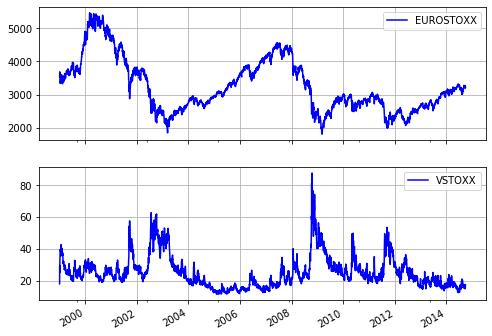

In [89]:
data.plot(subplots = True, grid = True, style = 'b', figsize = (8,6))

In [90]:
rets = np.log(data/data.shift(1))
rets.head()

,EUROSTOXX,VSTOXX
1999-01-04,NaN,NaN
1999-01-05,0.017228,0.489248
1999-01-06,0.022138,-0.165317
1999-01-07,-0.015723,0.256337
1999-01-08,-0.003120,0.021570


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000028C2E0BE848>,
      dtype=object)

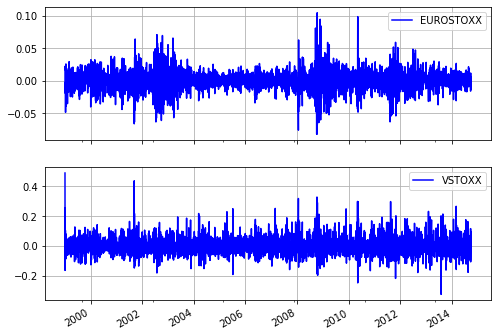

In [91]:
rets.dropna(inplace = True)
rets.plot(subplots = True, grid = True, style = 'b', figsize = (8,6))

In [92]:
xdat = rets['EUROSTOXX'].values
ydat = rets['VSTOXX'].values
reg = np.polyfit(x = xdat, y = ydat, deg = 1)

In [94]:
reg  # 첫번째 : 기울기(상관계수), 두번째 : y절편(바이어스)

array([-2.75289438e+00, -7.36991255e-05])

Text(0, 0.5, 'VSTOXX returns')

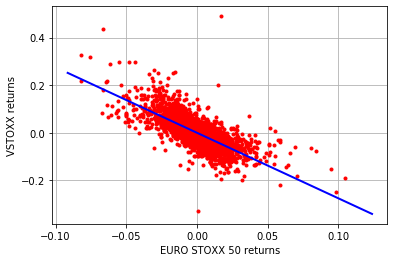

In [113]:
plt.plot(xdat, ydat, 'r.')  # r. -> .으로 나타내려고!
ax = plt.axis()
x = np.linspace(ax[0], ax[1] + 0.01)
plt.plot(x, reg[1] + reg[0] * x, 'b', lw = 2)
plt.grid(True)
plt.axis('tight')
plt.xlabel('EURO STOXX 50 returns')
plt.ylabel('VSTOXX returns')

In [114]:
rets.corr()

,EUROSTOXX,VSTOXX
EUROSTOXX,1.000000,-0.729538
VSTOXX,-0.729538,1.000000


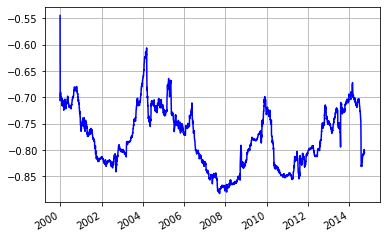

In [116]:
rets['EUROSTOXX'].rolling(252).corr(rets['VSTOXX']).plot(grid = True, style = 'b')

#  고빈도 자료

In [131]:
import numpy as np
import pandas as pd
import datetime as dt
%matplotlib inline

In [109]:
url1 = 'http://hopey.netfonds.no/kurs.php?exchange=N'
url2 = 'date=%s%s%s&paper=NKE.N&csv_format=csv'
url = url1 + url2

In [110]:
save3 = 'C:/Users/anrnd/Desktop/파이썬 금융분석/NKE.txt'

urlretrieve(url, save3)

URLError: <urlopen error [WinError 10060] 연결된 구성원으로부터 응답이 없어 연결하지 못했거나, 호스트로부터 응답이 없어 연결이 끊어졌습니다>

In [106]:
year = '2021'
month = '03'
days = ['02','03','04']

In [107]:
NKE = pd.DataFrame()
for day in days:
    NKE = NKE.append(pd.read_csv(save3 % (year, month, day), index_col = 0, header = 0, parse_dates = True))
NKE.columns = ['bid', 'bdepth', 'bdeptht', 'offer', 'odepth', 'odeptht']

TypeError: not all arguments converted during string formatting

In [ ]:
NKE['bid'].plot(grid = True)

In [ ]:
# 하루 틱데이터 & 거래량

to_plot = NKE[['bid', 'bdeptht']][(NKE.index > dt.datetime(2021, 3, 3, 15, 0)) &
                                   (NKE.index < dt.datetime(2021, 3, 4, 1, 0))]

to_plot.plot(subplots = True, style = 'b', figsize = (8,5), grid = True)

In [ ]:
# 틱 데이터: 자료사이 간격 불규칙 -> resampling :간격 일정하게

# -> Method: 단순히 평균값으로! 

NKE_resam = NKE.resample(rule = '5min').mean()
np.roung(NKE_resam.head(), 2)

In [ ]:
NKE_resam['bid'].fillna(method = 'ffill').plot(grid = True) # 빈자료를 가장 최근 자료로 채우기

In [ ]:
# 왜하는지는 모르겠는
# 주가 레벨에 대칭되도록 만들기???

def reversal(x):
    return 2 * 95 - x

NKE_resam['bid'].fillna(method = 'ffill').apply(reversal).plot(grid = True)